In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from glob import glob
from datetime import datetime, timedelta

## 데이터 불러오기

In [2]:
dangjin_fcst  = pd.read_csv('../data/태양광/dangjin_fcst_data.csv')
ulsan_fcst = pd.read_csv('../data/태양광/ulsan_fcst_data.csv')

energy = pd.read_csv('../data/태양광/energy.csv')
site_info = pd.read_csv('../data/태양광/site_info.csv')
sample_submission = pd.read_csv('../data/태양광/sample_submission.csv')

울산

In [3]:
display(ulsan_fcst)
ulsan_fcst.dtypes

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,8.0,20.0,14.0,298.0,2.0
1,2018-03-01 11:00:00,7.0,4.0,20.0,4.3,298.0,2.0
2,2018-03-01 11:00:00,10.0,3.0,30.0,1.9,309.0,2.0
3,2018-03-01 11:00:00,13.0,0.0,40.0,1.5,318.0,2.0
4,2018-03-01 11:00:00,16.0,-1.0,45.0,1.8,308.0,2.0
...,...,...,...,...,...,...,...
162203,2021-03-01 08:00:00,52.0,9.0,45.0,3.1,83.0,3.0
162204,2021-03-01 08:00:00,55.0,9.0,45.0,3.0,111.0,3.0
162205,2021-03-01 08:00:00,58.0,8.0,55.0,2.2,122.0,3.0
162206,2021-03-01 08:00:00,61.0,6.0,65.0,0.9,131.0,3.0


Forecast time     object
forecast         float64
Temperature      float64
Humidity         float64
WindSpeed        float64
WindDirection    float64
Cloud            float64
dtype: object

당진

In [4]:
display(dangjin_fcst)
dangjin_fcst.dtypes

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 11:00:00,7.0,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 11:00:00,10.0,-2.0,60.0,6.7,323.0,1.0
3,2018-03-01 11:00:00,13.0,-2.0,55.0,6.7,336.0,1.0
4,2018-03-01 11:00:00,16.0,-4.0,55.0,5.5,339.0,1.0
...,...,...,...,...,...,...,...
162203,2021-03-01 08:00:00,52.0,7.0,40.0,3.2,187.0,1.0
162204,2021-03-01 08:00:00,55.0,8.0,40.0,4.5,217.0,1.0
162205,2021-03-01 08:00:00,58.0,5.0,55.0,2.2,210.0,1.0
162206,2021-03-01 08:00:00,61.0,1.0,80.0,1.9,164.0,1.0


Forecast time     object
forecast         float64
Temperature      float64
Humidity         float64
WindSpeed        float64
WindDirection    float64
Cloud            float64
dtype: object

발전량 및 발전소 정보

In [5]:
display(energy)
energy.dtypes

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 1:00:00,0.0,0.0,0,0
1,2018-03-01 2:00:00,0.0,0.0,0,0
2,2018-03-01 3:00:00,0.0,0.0,0,0
3,2018-03-01 4:00:00,0.0,0.0,0,0
4,2018-03-01 5:00:00,0.0,0.0,0,0
...,...,...,...,...,...
25627,2021-01-31 20:00:00,0.0,0.0,0,0
25628,2021-01-31 21:00:00,0.0,0.0,0,0
25629,2021-01-31 22:00:00,0.0,0.0,0,0
25630,2021-01-31 23:00:00,0.0,0.0,0,0


time                  object
dangjin_floating     float64
dangjin_warehouse    float64
dangjin                int64
ulsan                  int64
dtype: object

In [6]:
display(site_info)

,Id,Capacity,Address,InstallationAngle,IncidentAngle,Latitude,Longitude
0,당진수상태양광,1.0,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
1,당진자재창고태양광,0.7,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
2,당진태양광,1.0,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
3,울산태양광,0.5,울산광역시 남구 용잠로 623,20.0,20.0,35.477651,129.380778


## 데이터 전처리

* 가장 나중의 예측 데이터가 가장 좋다고 가정
* data leakage를 피하기 위하여 다음과 같이 데이터를 채웠습니다.
    * 00:00:00는 전날 Forecast time 20:00:00의 forecast가 4 인 데이터로
    * 00:03:00부터는 전날 Forecast time 23:00:00의 forecast가 4~22 인 데이터로
* 데이터 타입 변경한 새로운 컬럼('Forecast_time')을 추가(Forecast time 컬럼을 datetime 형태로)    

In [7]:
def to_date(x):
    return timedelta(hours=x)

In [8]:
def generate_df(df_):
    df = df_.copy()

    df['Forecast_time'] = pd.to_datetime(df['Forecast time'])
    
    # 20시
    a = df[df["forecast"] == 4]
    a = a[a["Forecast time"].apply(lambda x: "20:00" in x)]
    a.loc[:, 'Forecast_time'] = a.loc[:, 'Forecast_time'] + a.loc[:, 'forecast'].map(to_date)

    # 23시
    b = df[df["forecast"] <= 22]
    b = b[b["Forecast time"].apply(lambda x: "23:00" in x)]
    b.loc[:, 'Forecast_time'] = b.loc[:, 'Forecast_time'] + b.loc[:, 'forecast'].map(to_date)

    # 병합
    c = pd.concat([a, b])
    print(f"20시 사용 데이터 길이 : {len(a)}")
    print(f"23시 사용 데이터 길이 : {len(b)}")
    print(f"합친 데이터 길이 : {len(c)}")
    print()

    # 정렬
    c.sort_values(by=['Forecast_time'], inplace=True)
    c = c[['Forecast_time', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']]

    return c

In [9]:
dangjin_filled = generate_df(dangjin_fcst)
ulsan_filled = generate_df(ulsan_fcst)

20시 사용 데이터 길이 : 1096
23시 사용 데이터 길이 : 7672
합친 데이터 길이 : 8768

20시 사용 데이터 길이 : 1096
23시 사용 데이터 길이 : 7672
합친 데이터 길이 : 8768



In [10]:
display(dangjin_filled)
display(ulsan_filled)

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
57,2018-03-02 00:00:00,-2.0,50.0,5.8,336.0,1.0
74,2018-03-02 03:00:00,-3.0,55.0,5.0,339.0,1.0
75,2018-03-02 06:00:00,-4.0,60.0,4.1,353.0,1.0
76,2018-03-02 09:00:00,-2.0,55.0,1.1,360.0,1.0
77,2018-03-02 12:00:00,2.0,45.0,1.0,259.0,1.0
...,...,...,...,...,...,...
162136,2021-03-01 09:00:00,8.0,90.0,4.0,97.0,4.0
162137,2021-03-01 12:00:00,9.0,90.0,5.4,3.0,4.0
162138,2021-03-01 15:00:00,10.0,90.0,2.7,360.0,4.0
162139,2021-03-01 18:00:00,6.0,85.0,7.6,17.0,4.0


,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
57,2018-03-02 00:00:00,0.0,40.0,1.3,321.0,2.0
74,2018-03-02 03:00:00,-1.0,45.0,1.8,299.0,2.0
75,2018-03-02 06:00:00,-1.0,45.0,1.8,304.0,1.0
76,2018-03-02 09:00:00,0.0,35.0,1.6,320.0,1.0
77,2018-03-02 12:00:00,6.0,25.0,1.4,326.0,1.0
...,...,...,...,...,...,...
162136,2021-03-01 09:00:00,15.0,80.0,4.1,155.0,4.0
162137,2021-03-01 12:00:00,17.0,70.0,5.2,173.0,4.0
162138,2021-03-01 15:00:00,17.0,75.0,5.2,179.0,4.0
162139,2021-03-01 18:00:00,17.0,80.0,7.3,187.0,4.0


#### 데이터 보간
* 날씨 예보 데이터는 3시간 간격으로만 존재하기 때문에 보간이 필요
* 선형 보간 수행

In [11]:
def interpolate_df(df, method='linear'):
    new_df = pd.DataFrame()
    new_df['Forecast_time'] = pd.date_range(start=df['Forecast_time'].iloc[0], end=df['Forecast_time'].iloc[-1], freq='H')
    new_df = pd.merge(new_df, df, on='Forecast_time', how='outer')
    return new_df.interpolate(method=method)

In [12]:
dangjin_interpolated = interpolate_df(dangjin_filled, method='linear')
ulsan_interpolated = interpolate_df(ulsan_filled, method='linear')

In [13]:
display(dangjin_interpolated)
display(ulsan_interpolated)

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,-2.000000,50.000000,5.800000,336.000000,1.0
1,2018-03-02 01:00:00,-2.333333,51.666667,5.533333,337.000000,1.0
2,2018-03-02 02:00:00,-2.666667,53.333333,5.266667,338.000000,1.0
3,2018-03-02 03:00:00,-3.000000,55.000000,5.000000,339.000000,1.0
4,2018-03-02 04:00:00,-3.333333,56.666667,4.700000,343.666667,1.0
...,...,...,...,...,...,...
26297,2021-03-01 17:00:00,7.333333,86.666667,5.966667,131.333333,4.0
26298,2021-03-01 18:00:00,6.000000,85.000000,7.600000,17.000000,4.0
26299,2021-03-01 19:00:00,5.333333,83.333333,7.466667,20.333333,4.0
26300,2021-03-01 20:00:00,4.666667,81.666667,7.333333,23.666667,4.0


,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,0.000000,40.000000,1.300000,321.000000,2.000000
1,2018-03-02 01:00:00,-0.333333,41.666667,1.466667,313.666667,2.000000
2,2018-03-02 02:00:00,-0.666667,43.333333,1.633333,306.333333,2.000000
3,2018-03-02 03:00:00,-1.000000,45.000000,1.800000,299.000000,2.000000
4,2018-03-02 04:00:00,-1.000000,45.000000,1.800000,300.666667,1.666667
...,...,...,...,...,...,...
26297,2021-03-01 17:00:00,17.000000,78.333333,6.600000,184.333333,4.000000
26298,2021-03-01 18:00:00,17.000000,80.000000,7.300000,187.000000,4.000000
26299,2021-03-01 19:00:00,16.000000,80.000000,6.133333,135.333333,4.000000
26300,2021-03-01 20:00:00,15.000000,80.000000,4.966667,83.666667,4.000000


* 보간 전후 시각화

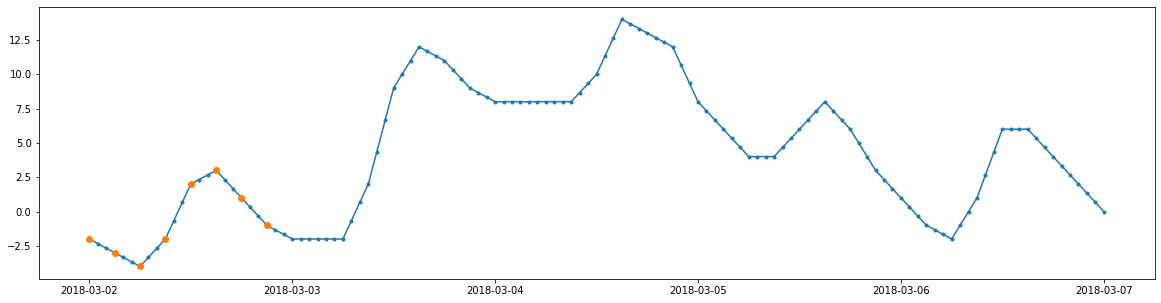

In [14]:
# 당진 
plt.figure(figsize=(20,5))
days = 5
plt.plot(dangjin_interpolated.loc[:24*days, 'Forecast_time'], dangjin_interpolated.loc[:24*days, 'Temperature'], '.-')
plt.plot(dangjin_filled.loc[:24*days, 'Forecast_time'], dangjin_filled.loc[:24*days, 'Temperature'], 'o')

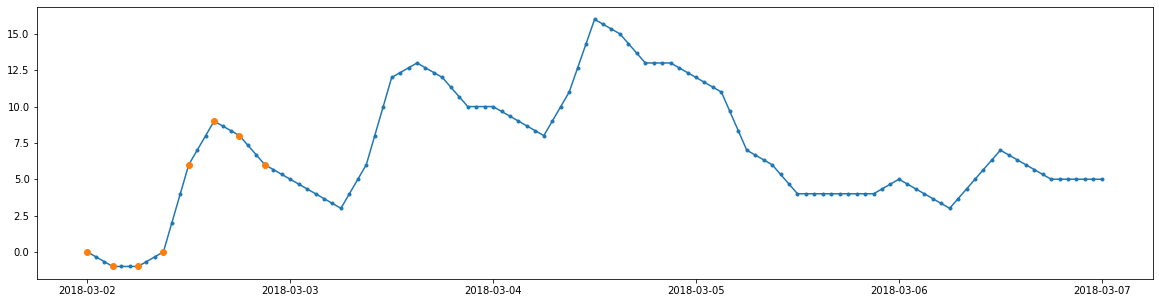

In [15]:
# 울산 
plt.figure(figsize=(20,5))
days = 5
plt.plot(ulsan_interpolated.loc[:24*days, 'Forecast_time'], ulsan_interpolated.loc[:24*days, 'Temperature'], '.-')
plt.plot(ulsan_filled.loc[:24*days, 'Forecast_time'], ulsan_filled.loc[:24*days, 'Temperature'], 'o')

In [16]:
dangjin_interpolated.dtypes

Forecast_time    datetime64[ns]
Temperature             float64
Humidity                float64
WindSpeed               float64
WindDirection           float64
Cloud                   float64
dtype: object

In [17]:
dangjin_interpolated.to_csv('../data/태양광/dangjin_fcst_data_interpolated_advanced.csv', index=False)
ulsan_interpolated.to_csv('../data/태양광/ulsan_fcst_data_interpolated_advanced.csv', index=False)

**energy와 병합**

* energy의 time을 기반으로 datetime 형태의 'Forecast_time'열 추가

In [18]:
energy.dtypes

time                  object
dangjin_floating     float64
dangjin_warehouse    float64
dangjin                int64
ulsan                  int64
dtype: object

In [19]:
energy['Forecast_time'] = pd.to_datetime(energy['time'],errors='coerce')
energy.dtypes

time                         object
dangjin_floating            float64
dangjin_warehouse           float64
dangjin                       int64
ulsan                         int64
Forecast_time        datetime64[ns]
dtype: object

-------------------------------------------------------------

In [21]:
# energy               : 2018-03-01 01:00:00 ~ 2021-01-31 24:00
# dangjin_interpolated : 2018-03-02 00:00:00 ~ 2021-03-01 21:00:00

**energy df에서 발전소별로 나누고, 0인 부분 삭제**

In [22]:
# 우선 energy에서 0인 부분 모두 날리기
energy.any(0)

time                 True
dangjin_floating     True
dangjin_warehouse    True
dangjin              True
ulsan                True
Forecast_time        True
dtype: bool

In [23]:
energy

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan,Forecast_time
0,2018-03-01 1:00:00,0.0,0.0,0,0,2018-03-01 01:00:00
1,2018-03-01 2:00:00,0.0,0.0,0,0,2018-03-01 02:00:00
2,2018-03-01 3:00:00,0.0,0.0,0,0,2018-03-01 03:00:00
3,2018-03-01 4:00:00,0.0,0.0,0,0,2018-03-01 04:00:00
4,2018-03-01 5:00:00,0.0,0.0,0,0,2018-03-01 05:00:00
...,...,...,...,...,...,...
25627,2021-01-31 20:00:00,0.0,0.0,0,0,2021-01-31 20:00:00
25628,2021-01-31 21:00:00,0.0,0.0,0,0,2021-01-31 21:00:00
25629,2021-01-31 22:00:00,0.0,0.0,0,0,2021-01-31 22:00:00
25630,2021-01-31 23:00:00,0.0,0.0,0,0,2021-01-31 23:00:00


In [24]:
# 발전소별로 발전량 분류, 0인 부분 삭제
energy_dangjin_floating = energy[['dangjin_floating','Forecast_time']][energy[['dangjin_floating']]['dangjin_floating'] != 0]
energy_dangjin_warehouse = energy[['dangjin_warehouse','Forecast_time']][energy[['dangjin_warehouse']]['dangjin_warehouse'] != 0]
energy_dangjin = energy[['dangjin','Forecast_time']][energy[['dangjin']]['dangjin'] != 0]
energy_ulsan = energy[['ulsan','Forecast_time']][energy[['ulsan']]['ulsan'] != 0]

# 칼람명 발전량으로 변경
energy_dangjin_floating.rename(columns={'dangjin_floating':'Energy'}, inplace=True)
energy_dangjin_warehouse.rename(columns={'dangjin_warehouse':'Energy'}, inplace=True)
energy_dangjin.rename(columns={'dangjin':'Energy'}, inplace=True)
energy_ulsan.rename(columns={'ulsan':'Energy'}, inplace=True)

energy_dangjin_floating

,Energy,Forecast_time
8,36.0,2018-03-01 09:00:00
9,313.0,2018-03-01 10:00:00
10,532.0,2018-03-01 11:00:00
11,607.0,2018-03-01 12:00:00
12,614.0,2018-03-01 13:00:00
...,...,...
25621,397.0,2021-01-31 14:00:00
25622,297.0,2021-01-31 15:00:00
25623,230.0,2021-01-31 16:00:00
25624,76.0,2021-01-31 17:00:00


-----------------------------------------------------------------------

# 일사량 예측 lstm 만들기

### 일사량 데이터

당진 대신 충남 서산 데이터 이용 <br>
울산 대신 경남 양산시 데이터 이용 <br>

In [25]:
danjin_radiation_2018 = pd.read_csv('../data/태양광/일사량/2018_충남일사량.csv', encoding='cp949')
danjin_radiation_2019 = pd.read_csv('../data/태양광/일사량/2019_충남일사량.csv', encoding='cp949')
danjin_radiation_2020 = pd.read_csv('../data/태양광/일사량/2020_충남일사량.csv', encoding='cp949')
danjin_radiation_2021 = pd.read_csv('../data/태양광/일사량/2021_충남일사량.csv', encoding='cp949')

ulsan_radiation_2018 = pd.read_csv('../data/태양광/일사량/2018_경남일사량.csv')
ulsan_radiation_2019 = pd.read_csv('../data/태양광/일사량/2019_경남일사량.csv', encoding='cp949')
ulsan_radiation_2020 = pd.read_csv('../data/태양광/일사량/2020_경남일사량.csv', encoding='cp949')
ulsan_radiation_2021 = pd.read_csv('../data/태양광/일사량/2021_경남일사량.csv', encoding='cp949')

In [26]:
danjin_radiation = danjin_radiation_2018.loc[danjin_radiation_2018['지점명']=='서산']
danjin_radiation = pd.concat([danjin_radiation, danjin_radiation_2019.loc[danjin_radiation_2019['지점명']=='서산']])
danjin_radiation = pd.concat([danjin_radiation, danjin_radiation_2020.loc[danjin_radiation_2020['지점명']=='서산']])
danjin_radiation = pd.concat([danjin_radiation, danjin_radiation_2021.loc[danjin_radiation_2021['지점명']=='서산']])

ulsan_radiation = ulsan_radiation_2018.loc[ulsan_radiation_2018['지점명']=='양산시']
ulsan_radiation = pd.concat([ulsan_radiation, ulsan_radiation_2019.loc[ulsan_radiation_2019['지점명']=='양산시']])
ulsan_radiation = pd.concat([ulsan_radiation, ulsan_radiation_2020.loc[ulsan_radiation_2020['지점명']=='양산시']])
ulsan_radiation = pd.concat([ulsan_radiation, ulsan_radiation_2021.loc[ulsan_radiation_2021['지점명']=='양산시']])

display(danjin_radiation)
display(ulsan_radiation)

# 저장
danjin_radiation.to_csv('../data/태양광/일사량/danjin_radiation.csv')
ulsan_radiation.to_csv('../data/태양광/일사량/ulsan_radiation.csv')

,지점,지점명,일시,일사(MJ/m2)
0,129,서산,2018-03-01 8:00,0.05
1,129,서산,2018-03-01 9:00,0.69
2,129,서산,2018-03-01 10:00,1.43
3,129,서산,2018-03-01 11:00,2.11
4,129,서산,2018-03-01 12:00,2.57
...,...,...,...,...
1055,129,서산,2021-03-30 15:00,2.85
1056,129,서산,2021-03-30 16:00,2.32
1057,129,서산,2021-03-30 17:00,1.65
1058,129,서산,2021-03-30 18:00,0.71


,지점,지점명,일시,일사(MJ/m2)
16411,257,양산시,2018-03-01 07:00,0.00
16412,257,양산시,2018-03-01 08:00,0.00
16413,257,양산시,2018-03-01 09:00,0.05
16414,257,양산시,2018-03-01 10:00,0.47
16415,257,양산시,2018-03-01 11:00,1.15
...,...,...,...,...
5311,257,양산시,2021-03-30 15:00,2.83
5312,257,양산시,2021-03-30 16:00,2.31
5313,257,양산시,2021-03-30 17:00,1.54
5314,257,양산시,2021-03-30 18:00,0.68


In [27]:
# NaN 값 확인
danjin_radiation.isnull().sum() #없음
ulsan_radiation.isnull().sum()  #없음

지점           0
지점명          0
일시           0
일사(MJ/m2)    0
dtype: int64

In [28]:
# datetime으로 맞추기
danjin_radiation['일시'] = pd.to_datetime(danjin_radiation['일시'])
ulsan_radiation['일시'] = pd.to_datetime(ulsan_radiation['일시'])

In [29]:
print(danjin_radiation.dtypes)
print()
print(ulsan_radiation.dtypes)

display(danjin_radiation.head(2))
display(ulsan_radiation.head(2))

지점                    int64
지점명                  object
일시           datetime64[ns]
일사(MJ/m2)           float64
dtype: object

지점                    int64
지점명                  object
일시           datetime64[ns]
일사(MJ/m2)           float64
dtype: object


,지점,지점명,일시,일사(MJ/m2)
0,129,서산,2018-03-01 08:00:00,0.05
1,129,서산,2018-03-01 09:00:00,0.69


,지점,지점명,일시,일사(MJ/m2)
16411,257,양산시,2018-03-01 07:00:00,0.0
16412,257,양산시,2018-03-01 08:00:00,0.0


In [30]:
# 결과가 잘 안나오면 이 부분을 어떻게 할지 고민해봐야함!!!

danjin_radiation.loc[danjin_radiation['일사(MJ/m2)']==0,] 
#당진 일사량 => 753개 0
ulsan_radiation.loc[ulsan_radiation['일사(MJ/m2)']==0,] 
#울산 일사량 => 888개 0

,지점,지점명,일시,일사(MJ/m2)
16411,257,양산시,2018-03-01 07:00:00,0.0
16412,257,양산시,2018-03-01 08:00:00,0.0
16423,257,양산시,2018-03-01 19:00:00,0.0
16424,257,양산시,2018-03-02 07:00:00,0.0
16437,257,양산시,2018-03-03 07:00:00,0.0
...,...,...,...,...
5044,257,양산시,2021-03-10 07:00:00,0.0
5057,257,양산시,2021-03-11 07:00:00,0.0
5070,257,양산시,2021-03-12 07:00:00,0.0
5122,257,양산시,2021-03-16 07:00:00,0.0


In [31]:
# 날짜 &시간 맞추기
# dangjin_interpolated : 2018-03-02 00:00:00 ~ 2021-03-01 21:00:00 이거에 맞추기
# 일사량 df들(danjin_radiation, ulsan_radiation) 08시~19시까지만 나와있음.
# inner join으로 합치기

Danjin_df = pd.merge(dangjin_interpolated, danjin_radiation, how='inner', left_on='Forecast_time', right_on='일시')
Danjin_df = Danjin_df.drop(['지점','지점명','일시'], axis=1)
Danjin_df = Danjin_df.set_index('Forecast_time')
display(Danjin_df)

Ulsan_df = pd.merge(ulsan_interpolated, ulsan_radiation, how='inner', left_on='Forecast_time', right_on='일시')
Ulsan_df = Ulsan_df.drop(['지점','지점명','일시'], axis=1)
Ulsan_df = Ulsan_df.set_index('Forecast_time')
display(Ulsan_df)

,Temperature,Humidity,WindSpeed,WindDirection,Cloud,일사(MJ/m2)
Forecast_time,,,,,,
2018-03-02 08:00:00,-2.666667,56.666667,2.100000,357.666667,1.0,0.20
2018-03-02 09:00:00,-2.000000,55.000000,1.100000,360.000000,1.0,0.92
2018-03-02 10:00:00,-0.666667,51.666667,1.066667,326.333333,1.0,1.63
2018-03-02 11:00:00,0.666667,48.333333,1.033333,292.666667,1.0,2.26
2018-03-02 12:00:00,2.000000,45.000000,1.000000,259.000000,1.0,2.69
...,...,...,...,...,...,...
2021-03-01 15:00:00,10.000000,90.000000,2.700000,360.000000,4.0,0.19
2021-03-01 16:00:00,8.666667,88.333333,4.333333,245.666667,4.0,0.12
2021-03-01 17:00:00,7.333333,86.666667,5.966667,131.333333,4.0,0.09


,Temperature,Humidity,WindSpeed,WindDirection,Cloud,일사(MJ/m2)
Forecast_time,,,,,,
2018-03-02 07:00:00,-0.666667,41.666667,1.733333,309.333333,1.0,0.00
2018-03-02 08:00:00,-0.333333,38.333333,1.666667,314.666667,1.0,0.07
2018-03-02 09:00:00,0.000000,35.000000,1.600000,320.000000,1.0,0.53
2018-03-02 10:00:00,2.000000,31.666667,1.533333,322.000000,1.0,0.95
2018-03-02 11:00:00,4.000000,28.333333,1.466667,324.000000,1.0,1.27
...,...,...,...,...,...,...
2021-03-01 15:00:00,17.000000,75.000000,5.200000,179.000000,4.0,0.14
2021-03-01 16:00:00,17.000000,76.666667,5.900000,181.666667,4.0,0.15
2021-03-01 17:00:00,17.000000,78.333333,6.600000,184.333333,4.0,0.10


### 당진

학습에 이용할 df : Danjin_df, Ulsan_df <br>

In [32]:
from math import sqrt
from numpy import concatenate
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [33]:
# series를 지도학습으로 (supervised learning)
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    
    cols, names = list(), list()
    
    # 입력값의 순서 (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    # 예측의 순서 (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
    # 합치기
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # NaN 값의 row를 제거
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg

In [34]:
#############################################################################################
dataset = Danjin_df
values = dataset.values #values.shape (14280,6 )


# 모든 데이터를 float으로
values = values.astype('float32')

# 정규화
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values[:,:4])  #전운량, 일사량 제외하고 정규화
scaled = np.append(scaled, values[:,4:], axis=1) #합침. scaled.shape (14280,6)

# 지도학습 프레임으로
reframed = series_to_supervised(scaled, 1, 1) 
display(reframed)

# # 사용하지 않을 칼람 제거
reframed.drop(['var1(t)', 'var2(t)', 'var3(t)','var4(t)','var5(t)'], axis=1, inplace=True)

# print('======================= reframed ==========================')
display(reframed)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
1,0.231293,0.518519,0.069930,0.993500,1.0,0.20,0.244898,0.500000,0.034965,1.000000,1.0,0.92
2,0.244898,0.500000,0.034965,1.000000,1.0,0.92,0.272109,0.462963,0.033800,0.906221,1.0,1.63
3,0.272109,0.462963,0.033800,0.906221,1.0,1.63,0.299320,0.425926,0.032634,0.812442,1.0,2.26
4,0.299320,0.425926,0.032634,0.812442,1.0,2.26,0.326531,0.388889,0.031469,0.718663,1.0,2.69
5,0.326531,0.388889,0.031469,0.718663,1.0,2.69,0.333333,0.425926,0.050117,0.732591,1.0,2.89
...,...,...,...,...,...,...,...,...,...,...,...,...
14275,0.482993,0.888889,0.122378,0.668524,4.0,0.21,0.489796,0.888889,0.090909,1.000000,4.0,0.19
14276,0.489796,0.888889,0.090909,1.000000,4.0,0.19,0.462585,0.870370,0.148019,0.681523,4.0,0.12
14277,0.462585,0.870370,0.148019,0.681523,4.0,0.12,0.435374,0.851852,0.205128,0.363045,4.0,0.09
14278,0.435374,0.851852,0.205128,0.363045,4.0,0.09,0.408163,0.833333,0.262238,0.044568,4.0,0.04


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var6(t)
1,0.231293,0.518519,0.069930,0.993500,1.0,0.20,0.92
2,0.244898,0.500000,0.034965,1.000000,1.0,0.92,1.63
3,0.272109,0.462963,0.033800,0.906221,1.0,1.63,2.26
4,0.299320,0.425926,0.032634,0.812442,1.0,2.26,2.69
5,0.326531,0.388889,0.031469,0.718663,1.0,2.69,2.89
...,...,...,...,...,...,...,...
14275,0.482993,0.888889,0.122378,0.668524,4.0,0.21,0.19
14276,0.489796,0.888889,0.090909,1.000000,4.0,0.19,0.12
14277,0.462585,0.870370,0.148019,0.681523,4.0,0.12,0.09
14278,0.435374,0.851852,0.205128,0.363045,4.0,0.09,0.04


In [35]:
# train and test sets으로 나누기
values = reframed.values
n_train_hours = int(len(values)*0.8)  # 8:2비율
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

print('======================== reframed ==========================')
print(len(train)) #12423
print(len(test))  #2856


# 입력/출력값으로 분리
train_X, train_y = train[:,:-1], train[:,-1]
test_X, test_y = test[:,:-1], test[:,-1]


print('================ shape of train_X ==========================')
print(train_X.shape) #(11423, 7)


# lstm : [samples, timesteps, features]
# 입력값을 3D로 reshape [samples, timestpes, features] #1시간
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print('================ reshape 후 train_X 의 shape ===============')
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    #(11423, 1, 7)    (11423,)      (2856, 1, 7)   (2856,)

======================== reframed ==========================
11423
2856
================ shape of train_X ==========================
(11423, 6)
================ reshape 후 train_X 의 shape ===============
(11423, 1, 6) (11423,) (2856, 1, 6) (2856,)


In [36]:
# model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit
history = model.fit(train_X, train_y,
                    epochs=100, batch_size=72,
                    validation_data=(test_X, test_y), 
                    verbose=1, shuffle=False)

Epoch 1/100
159/159 [==============================] - 2s 11ms/step - loss: 0.7215 - val_loss: 0.3467
Epoch 2/100
159/159 [==============================] - 1s 5ms/step - loss: 0.3844 - val_loss: 0.3235
Epoch 3/100
159/159 [==============================] - 1s 5ms/step - loss: 0.3670 - val_loss: 0.3193
Epoch 4/100
159/159 [==============================] - 1s 5ms/step - loss: 0.3594 - val_loss: 0.3166
Epoch 5/100
159/159 [==============================] - 1s 4ms/step - loss: 0.3544 - val_loss: 0.3146
Epoch 6/100
159/159 [==============================] - 1s 4ms/step - loss: 0.3510 - val_loss: 0.3132
Epoch 7/100
159/159 [==============================] - 1s 5ms/step - loss: 0.3493 - val_loss: 0.3134
Epoch 8/100
159/159 [==============================] - 1s 5ms/step - loss: 0.3487 - val_loss: 0.3151
Epoch 9/100
159/159 [==============================] - 1s 4ms/step - loss: 0.3489 - val_loss: 0.3181
Epoch 10/100
159/159 [==============================] - 1s 5ms/step - loss: 0.3500 - val_l

In [37]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

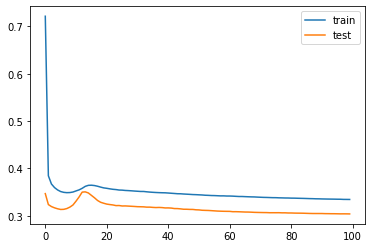

In [38]:
# loss 차이 그래프로 보기
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [39]:
# 예측(prediction)
yhat = model.predict(test_X)
print(yhat)
print(yhat.shape)

[[0.1890094 ]
 [0.20224632]
 [0.19934376]
 ...
 [0.2260404 ]
 [0.19034205]
 [0.13331974]]
(2856, 1)


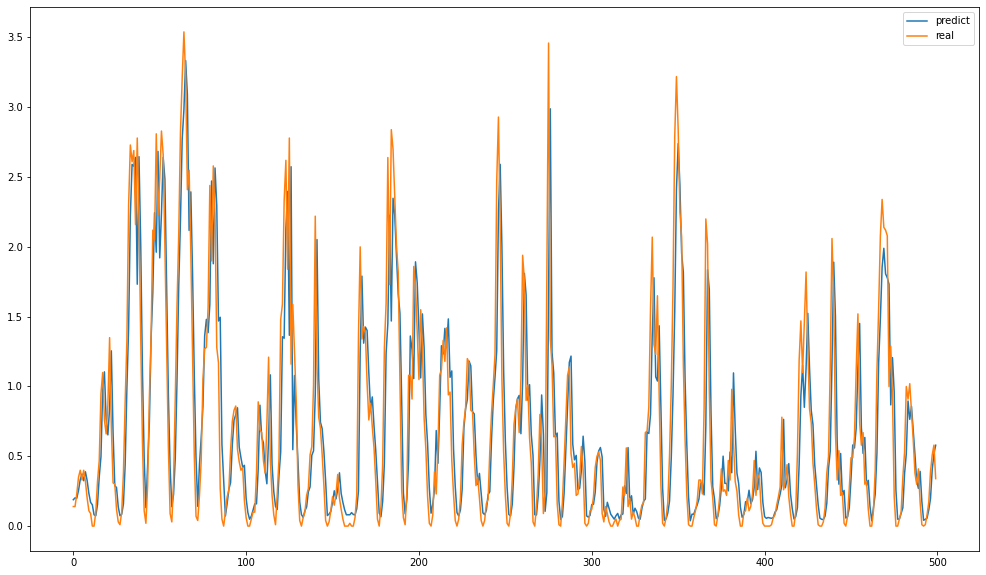

In [41]:
# 실제값과 예측값 - 그래프로 보기
plt.figure(figsize=(17,10))
plt.plot(yhat[:500], label='predict')
plt.plot(test_y[:500], label='real')
plt.legend()
plt.show()

In [42]:
# 모델 저장하기 
from tensorflow.keras.models import load_model

model.save('../data/태양광/lstm_for_Danjin_radiation.h5')

In [ ]:
#----------------------------------------------------------------------------------------------------------------

In [43]:
#실제로 해보기
dataset = Danjin_df
values = dataset.values #values.shape (14280,6)


# 모든 데이터를 float으로
values = values.astype('float32')

# 정규화
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values[:,:4])  #전운량제외하고 정규화
scaled = np.append(scaled, values[:,4:], axis=1) #합침. scaled.shape (14280,6)

# 지도학습 프레임으로
reframed = series_to_supervised(scaled, 1, 1) 
display(reframed)

# # 사용하지 않을 칼람 제거
reframed.drop(['var1(t)', 'var2(t)', 'var3(t)','var4(t)','var5(t)','var6(t)'], axis=1, inplace=True)

# print('======================= reframed ==========================')
display(reframed)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
1,0.231293,0.518519,0.069930,0.993500,1.0,0.20,0.244898,0.500000,0.034965,1.000000,1.0,0.92
2,0.244898,0.500000,0.034965,1.000000,1.0,0.92,0.272109,0.462963,0.033800,0.906221,1.0,1.63
3,0.272109,0.462963,0.033800,0.906221,1.0,1.63,0.299320,0.425926,0.032634,0.812442,1.0,2.26
4,0.299320,0.425926,0.032634,0.812442,1.0,2.26,0.326531,0.388889,0.031469,0.718663,1.0,2.69
5,0.326531,0.388889,0.031469,0.718663,1.0,2.69,0.333333,0.425926,0.050117,0.732591,1.0,2.89
...,...,...,...,...,...,...,...,...,...,...,...,...
14275,0.482993,0.888889,0.122378,0.668524,4.0,0.21,0.489796,0.888889,0.090909,1.000000,4.0,0.19
14276,0.489796,0.888889,0.090909,1.000000,4.0,0.19,0.462585,0.870370,0.148019,0.681523,4.0,0.12
14277,0.462585,0.870370,0.148019,0.681523,4.0,0.12,0.435374,0.851852,0.205128,0.363045,4.0,0.09
14278,0.435374,0.851852,0.205128,0.363045,4.0,0.09,0.408163,0.833333,0.262238,0.044568,4.0,0.04


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1)
1,0.231293,0.518519,0.069930,0.993500,1.0,0.20
2,0.244898,0.500000,0.034965,1.000000,1.0,0.92
3,0.272109,0.462963,0.033800,0.906221,1.0,1.63
4,0.299320,0.425926,0.032634,0.812442,1.0,2.26
5,0.326531,0.388889,0.031469,0.718663,1.0,2.69
...,...,...,...,...,...,...
14275,0.482993,0.888889,0.122378,0.668524,4.0,0.21
14276,0.489796,0.888889,0.090909,1.000000,4.0,0.19
14277,0.462585,0.870370,0.148019,0.681523,4.0,0.12
14278,0.435374,0.851852,0.205128,0.363045,4.0,0.09


In [44]:
# train and test sets으로 나누기
values = reframed.values
train_X = values


print('================ shape of train_X ==========================')
print(train_X.shape) 


# lstm : [samples, timesteps, features]
# 입력값을 3D로 reshape [samples, timestpes, features] #1시간
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))


print('================ reshape 후 train_X 의 shape ===============')
print(train_X.shape) 

================ shape of train_X ==========================
(14279, 6)
================ reshape 후 train_X 의 shape ===============
(14279, 1, 6)


In [45]:
# 모델 불러오기
from tensorflow.keras.models import load_model
model = load_model('../data/태양광/lstm_for_Danjin_radiation.h5')

In [46]:
# 예측(prediction)
predict = model.predict(train_X)
print(predict)
print(predict.shape)


actual = np.array(Danjin_df['일사(MJ/m2)'])
print(actual)
print(actual.shape)

[[0.24583966]
 [0.9328196 ]
 [1.8377213 ]
 ...
 [0.2260404 ]
 [0.19034205]
 [0.13331974]]
(14279, 1)
[0.2  0.92 1.63 ... 0.09 0.04 0.  ]
(14280,)


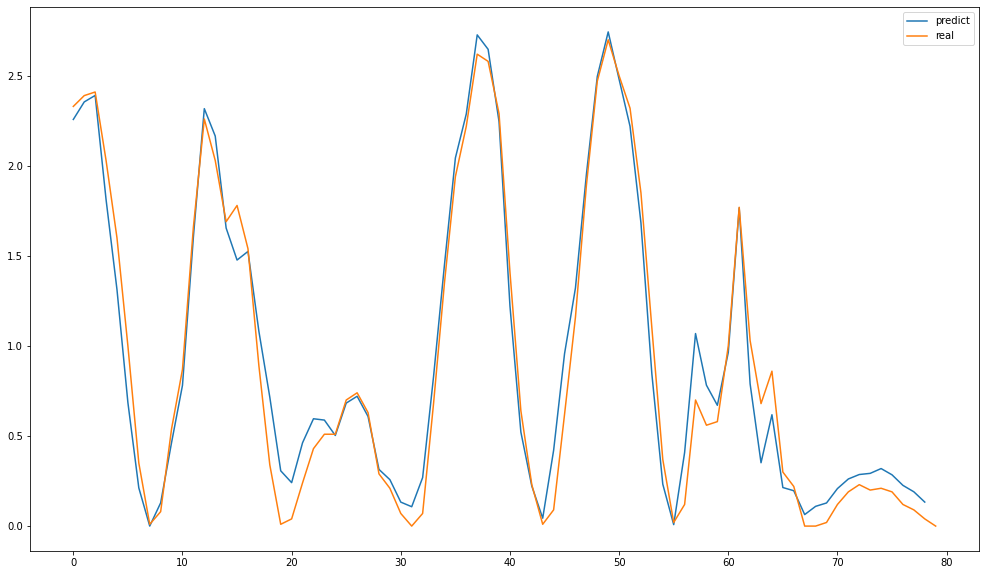

In [47]:
# 실제값과 예측값 - 그래프로 보기

plt.figure(figsize=(17,10))
plt.plot(predict[14200:], label='predict')
plt.plot(actual[14200:], label='real')
plt.legend()
plt.show()

In [48]:
predict = np.append(predict, predict[-1])
Danjin_df['예측된 일사량'] = predict
Danjin_df

,Temperature,Humidity,WindSpeed,WindDirection,Cloud,일사(MJ/m2),예측된 일사량
Forecast_time,,,,,,,
2018-03-02 08:00:00,-2.666667,56.666667,2.100000,357.666667,1.0,0.20,0.245840
2018-03-02 09:00:00,-2.000000,55.000000,1.100000,360.000000,1.0,0.92,0.932820
2018-03-02 10:00:00,-0.666667,51.666667,1.066667,326.333333,1.0,1.63,1.837721
2018-03-02 11:00:00,0.666667,48.333333,1.033333,292.666667,1.0,2.26,2.659842
2018-03-02 12:00:00,2.000000,45.000000,1.000000,259.000000,1.0,2.69,3.161201
...,...,...,...,...,...,...,...
2021-03-01 15:00:00,10.000000,90.000000,2.700000,360.000000,4.0,0.19,0.284665
2021-03-01 16:00:00,8.666667,88.333333,4.333333,245.666667,4.0,0.12,0.226040
2021-03-01 17:00:00,7.333333,86.666667,5.966667,131.333333,4.0,0.09,0.190342


In [49]:
Danjin_include_radiation = Danjin_df.drop(['일사(MJ/m2)'], axis=1, inplace=False)
Danjin_include_radiation

,Temperature,Humidity,WindSpeed,WindDirection,Cloud,예측된 일사량
Forecast_time,,,,,,
2018-03-02 08:00:00,-2.666667,56.666667,2.100000,357.666667,1.0,0.245840
2018-03-02 09:00:00,-2.000000,55.000000,1.100000,360.000000,1.0,0.932820
2018-03-02 10:00:00,-0.666667,51.666667,1.066667,326.333333,1.0,1.837721
2018-03-02 11:00:00,0.666667,48.333333,1.033333,292.666667,1.0,2.659842
2018-03-02 12:00:00,2.000000,45.000000,1.000000,259.000000,1.0,3.161201
...,...,...,...,...,...,...
2021-03-01 15:00:00,10.000000,90.000000,2.700000,360.000000,4.0,0.284665
2021-03-01 16:00:00,8.666667,88.333333,4.333333,245.666667,4.0,0.226040
2021-03-01 17:00:00,7.333333,86.666667,5.966667,131.333333,4.0,0.190342


## 울산

In [50]:
dataset = Ulsan_df
values = dataset.values 

# 모든 데이터를 float으로
values = values.astype('float32')

# 정규화
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values[:,:4])  #전운량, 일사량 제외하고 정규화
scaled = np.append(scaled, values[:,4:], axis=1) #합침

# 지도학습 프레임으로
reframed = series_to_supervised(scaled, 1, 1) 
display(reframed)

# # 사용하지 않을 칼람 제거
reframed.drop(['var1(t)', 'var2(t)', 'var3(t)','var4(t)','var5(t)'], axis=1, inplace=True)

# print('======================= reframed ==========================')
display(reframed)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
1,0.235294,0.385965,0.047750,0.859259,1.0,0.00,0.242647,0.350877,0.045914,0.874074,1.0,0.07
2,0.242647,0.350877,0.045914,0.874074,1.0,0.07,0.250000,0.315789,0.044077,0.888889,1.0,0.53
3,0.250000,0.315789,0.044077,0.888889,1.0,0.53,0.294118,0.280702,0.042241,0.894444,1.0,0.95
4,0.294118,0.280702,0.042241,0.894444,1.0,0.95,0.338235,0.245614,0.040404,0.900000,1.0,1.27
5,0.338235,0.245614,0.040404,0.900000,1.0,1.27,0.382353,0.210526,0.038567,0.905556,1.0,1.49
...,...,...,...,...,...,...,...,...,...,...,...,...
14139,0.625000,0.719298,0.143251,0.491667,4.0,0.18,0.625000,0.736842,0.143251,0.497222,4.0,0.14
14140,0.625000,0.736842,0.143251,0.497222,4.0,0.14,0.625000,0.754386,0.162534,0.504630,4.0,0.15
14141,0.625000,0.754386,0.162534,0.504630,4.0,0.15,0.625000,0.771930,0.181818,0.512037,4.0,0.10
14142,0.625000,0.771930,0.181818,0.512037,4.0,0.10,0.625000,0.789474,0.201102,0.519444,4.0,0.03


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var6(t)
1,0.235294,0.385965,0.047750,0.859259,1.0,0.00,0.07
2,0.242647,0.350877,0.045914,0.874074,1.0,0.07,0.53
3,0.250000,0.315789,0.044077,0.888889,1.0,0.53,0.95
4,0.294118,0.280702,0.042241,0.894444,1.0,0.95,1.27
5,0.338235,0.245614,0.040404,0.900000,1.0,1.27,1.49
...,...,...,...,...,...,...,...
14139,0.625000,0.719298,0.143251,0.491667,4.0,0.18,0.14
14140,0.625000,0.736842,0.143251,0.497222,4.0,0.14,0.15
14141,0.625000,0.754386,0.162534,0.504630,4.0,0.15,0.10
14142,0.625000,0.771930,0.181818,0.512037,4.0,0.10,0.03


In [51]:
# train and test sets으로 나누기
values = reframed.values
n_train_hours = int(len(values)*0.8)  # 8:2비율
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

print('======================== reframed ==========================')
print(len(train))
print(len(test)) 

# 입력/출력값으로 분리
train_X, train_y = train[:,:-1], train[:,-1]
test_X, test_y = test[:,:-1], test[:,-1]


print('================ shape of train_X ==========================')
print(train_X.shape) #(11423, 7)


# lstm : [samples, timesteps, features]
# 입력값을 3D로 reshape [samples, timestpes, features] #1시간
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print('================ reshape 후 train_X 의 shape ===============')
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

======================== reframed ==========================
11314
2829
================ shape of train_X ==========================
(11314, 6)
================ reshape 후 train_X 의 shape ===============
(11314, 1, 6) (11314,) (2829, 1, 6) (2829,)


In [52]:
# model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit
history = model.fit(train_X, train_y,
                    epochs=100, batch_size=72,
                    validation_data=(test_X, test_y), 
                    verbose=1, shuffle=False)

Epoch 1/100
158/158 [==============================] - 2s 11ms/step - loss: 0.3797 - val_loss: 0.3714
Epoch 2/100
158/158 [==============================] - 1s 6ms/step - loss: 0.2488 - val_loss: 0.3602
Epoch 3/100
158/158 [==============================] - 1s 5ms/step - loss: 0.2405 - val_loss: 0.3554
Epoch 4/100
158/158 [==============================] - 1s 6ms/step - loss: 0.2373 - val_loss: 0.3531
Epoch 5/100
158/158 [==============================] - 1s 6ms/step - loss: 0.2362 - val_loss: 0.3505
Epoch 6/100
158/158 [==============================] - 1s 5ms/step - loss: 0.2364 - val_loss: 0.3499
Epoch 7/100
158/158 [==============================] - 1s 5ms/step - loss: 0.2365 - val_loss: 0.3489
Epoch 8/100
158/158 [==============================] - 1s 5ms/step - loss: 0.2366 - val_loss: 0.3494
Epoch 9/100
158/158 [==============================] - 1s 5ms/step - loss: 0.2363 - val_loss: 0.3492
Epoch 10/100
158/158 [==============================] - 1s 5ms/step - loss: 0.2360 - val_l

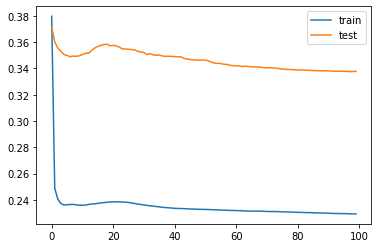

In [53]:
# loss 차이 그래프로 보기
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [54]:
# 예측(prediction)
yhat = model.predict(test_X)
print(yhat)
print(yhat.shape)

[[0.31538138]
 [0.97804517]
 [1.8706125 ]
 ...
 [0.1667843 ]
 [0.12999713]
 [0.07974166]]
(2829, 1)


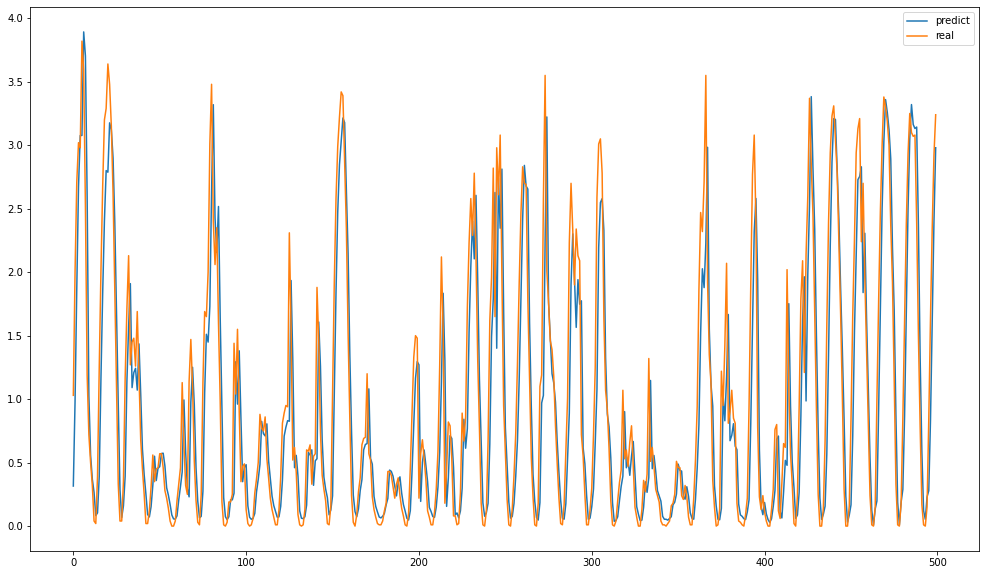

In [55]:
# 실제값과 예측값 - 그래프로 보기
plt.figure(figsize=(17,10))
plt.plot(yhat[:500], label='predict')
plt.plot(test_y[:500], label='real')
plt.legend()
plt.show()

In [56]:
# 모델 저장하기 
from tensorflow.keras.models import load_model

model.save('../data/태양광/lstm_for_Ulsan_radiation.h5')

In [57]:
############실제로
#실제로 해보기
dataset = Ulsan_df
values = dataset.values 

# 모든 데이터를 float으로
values = values.astype('float32')

# 정규화
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values[:,:4])  #전운량제외하고 정규화
scaled = np.append(scaled, values[:,4:], axis=1) #합침. scaled.shape (14280,6)

# 지도학습 프레임으로
reframed = series_to_supervised(scaled, 1, 1) 
display(reframed)

# # 사용하지 않을 칼람 제거
reframed.drop(['var1(t)', 'var2(t)', 'var3(t)','var4(t)','var5(t)','var6(t)'], axis=1, inplace=True)

# print('======================= reframed ==========================')
display(reframed)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
1,0.235294,0.385965,0.047750,0.859259,1.0,0.00,0.242647,0.350877,0.045914,0.874074,1.0,0.07
2,0.242647,0.350877,0.045914,0.874074,1.0,0.07,0.250000,0.315789,0.044077,0.888889,1.0,0.53
3,0.250000,0.315789,0.044077,0.888889,1.0,0.53,0.294118,0.280702,0.042241,0.894444,1.0,0.95
4,0.294118,0.280702,0.042241,0.894444,1.0,0.95,0.338235,0.245614,0.040404,0.900000,1.0,1.27
5,0.338235,0.245614,0.040404,0.900000,1.0,1.27,0.382353,0.210526,0.038567,0.905556,1.0,1.49
...,...,...,...,...,...,...,...,...,...,...,...,...
14139,0.625000,0.719298,0.143251,0.491667,4.0,0.18,0.625000,0.736842,0.143251,0.497222,4.0,0.14
14140,0.625000,0.736842,0.143251,0.497222,4.0,0.14,0.625000,0.754386,0.162534,0.504630,4.0,0.15
14141,0.625000,0.754386,0.162534,0.504630,4.0,0.15,0.625000,0.771930,0.181818,0.512037,4.0,0.10
14142,0.625000,0.771930,0.181818,0.512037,4.0,0.10,0.625000,0.789474,0.201102,0.519444,4.0,0.03


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1)
1,0.235294,0.385965,0.047750,0.859259,1.0,0.00
2,0.242647,0.350877,0.045914,0.874074,1.0,0.07
3,0.250000,0.315789,0.044077,0.888889,1.0,0.53
4,0.294118,0.280702,0.042241,0.894444,1.0,0.95
5,0.338235,0.245614,0.040404,0.900000,1.0,1.27
...,...,...,...,...,...,...
14139,0.625000,0.719298,0.143251,0.491667,4.0,0.18
14140,0.625000,0.736842,0.143251,0.497222,4.0,0.14
14141,0.625000,0.754386,0.162534,0.504630,4.0,0.15
14142,0.625000,0.771930,0.181818,0.512037,4.0,0.10


In [58]:
# train and test sets으로 나누기
values = reframed.values
train_X = values


print('================ shape of train_X ==========================')
print(train_X.shape) 


# lstm : [samples, timesteps, features]
# 입력값을 3D로 reshape [samples, timestpes, features] #1시간
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))


print('================ reshape 후 train_X 의 shape ===============')
print(train_X.shape) 

================ shape of train_X ==========================
(14143, 6)
================ reshape 후 train_X 의 shape ===============
(14143, 1, 6)


In [61]:
# 모델 불러오기
from tensorflow.keras.models import load_model
model = load_model('../data/태양광/lstm_for_Ulsan_radiation.h5')

# 예측(prediction)
predict = model.predict(train_X)
print(predict)
print(predict.shape)


actual = np.array(Ulsan_df['일사(MJ/m2)'])
print(actual)
print(actual.shape)

[[0.2183558 ]
 [0.25340596]
 [0.6745418 ]
 ...
 [0.1667843 ]
 [0.12999713]
 [0.07974166]]
(14143, 1)
[0.   0.07 0.53 ... 0.1  0.03 0.01]
(14144,)


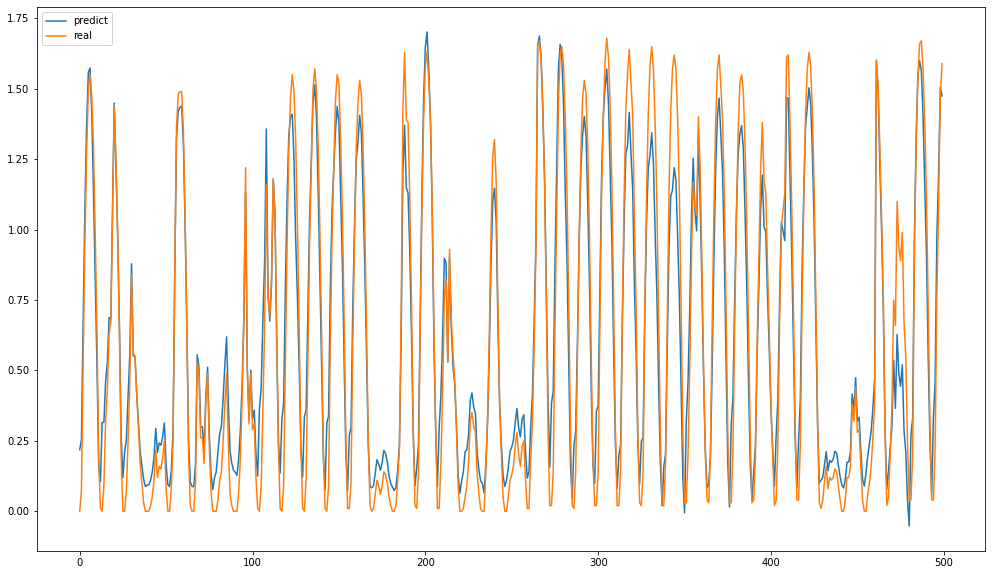

In [62]:
# 실제값과 예측값 - 그래프로 보기

plt.figure(figsize=(17,10))
plt.plot(predict[:500], label='predict')
plt.plot(actual[:500], label='real')
plt.legend()
plt.show()

In [63]:
predict = np.append(predict, predict[-1])
Ulsan_df['예측된 일사량'] = predict

Ulsan_include_radiation = Ulsan_df.drop(['일사(MJ/m2)'], axis=1, inplace=False)
Ulsan_include_radiation

,Temperature,Humidity,WindSpeed,WindDirection,Cloud,예측된 일사량
Forecast_time,,,,,,
2018-03-02 07:00:00,-0.666667,41.666667,1.733333,309.333333,1.0,0.218356
2018-03-02 08:00:00,-0.333333,38.333333,1.666667,314.666667,1.0,0.253406
2018-03-02 09:00:00,0.000000,35.000000,1.600000,320.000000,1.0,0.674542
2018-03-02 10:00:00,2.000000,31.666667,1.533333,322.000000,1.0,1.067870
2018-03-02 11:00:00,4.000000,28.333333,1.466667,324.000000,1.0,1.370541
...,...,...,...,...,...,...
2021-03-01 15:00:00,17.000000,75.000000,5.200000,179.000000,4.0,0.155322
2021-03-01 16:00:00,17.000000,76.666667,5.900000,181.666667,4.0,0.166784
2021-03-01 17:00:00,17.000000,78.333333,6.600000,184.333333,4.0,0.129997


In [64]:
Ulsan_include_radiation.to_csv('../data/태양광/Ulsan_include_radiation.csv')
Danjin_include_radiation.to_csv('../data/태양광/Danjin_include_radiation.csv')

# 현재까지 만든 예측한 일사량 포함한 df
Danjin_include_radiation <br>
Ulsan_include_radiation <br>